In [3]:
import numpy as np 
import cv2 
import matplotlib.pyplot as plt

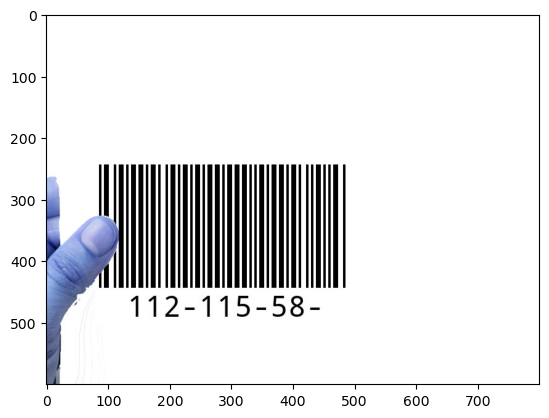

In [4]:
img = cv2.imread(r"C:\Users\USER\OneDrive\Desktop\CV Project\Test Cases\03 - eda ya3am ew3a soba3ak mathazarsh.jpg")
plt.imshow(img , cmap='gray')
plt.show()

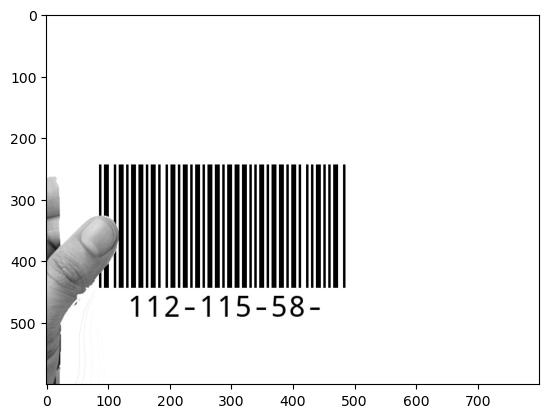

In [5]:
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(img_gray, cmap='gray')
plt.show()

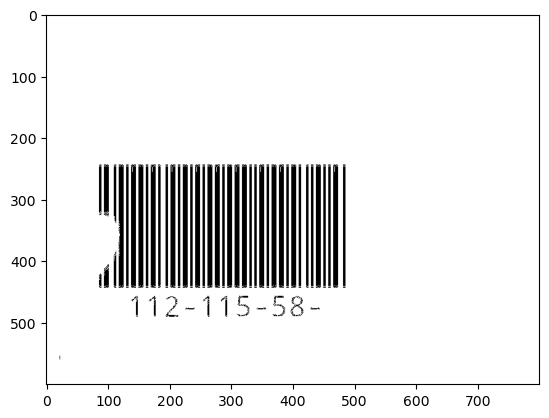

In [6]:
threshold_value = 2
_, binary_image = cv2.threshold(img_gray, threshold_value, 255, cv2.THRESH_BINARY)
# Thresholded Image
plt.imshow(binary_image, cmap='gray')
plt.show()


<function matplotlib.pyplot.show(close=None, block=None)>

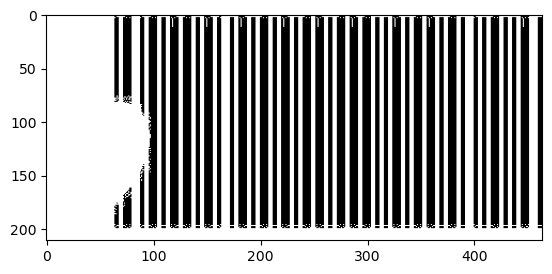

In [7]:
inverted_image = cv2.bitwise_not(binary_image)
x,y,w,h = cv2.boundingRect(inverted_image)
cropped_img = binary_image[y:y+h-h//3, x:x+w]
plt.imshow(cropped_img, cmap='gray')
plt.show


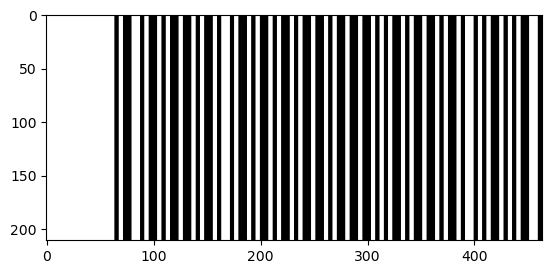

In [8]:
kernel = np.ones((100, 1), np.uint8) 
opened_image = cv2.morphologyEx(cropped_img, cv2.MORPH_OPEN, kernel)
plt.imshow(opened_image, cmap='gray')
plt.show()


<function matplotlib.pyplot.show(close=None, block=None)>

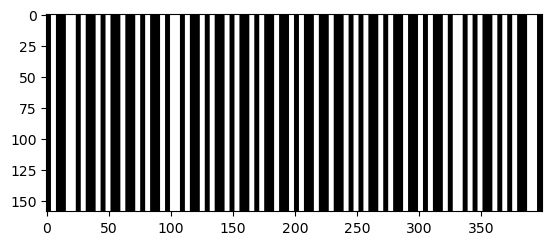

In [15]:
inverted_image2 = cv2.bitwise_not(opened_image)
x,y,w,h = cv2.boundingRect(inverted_image2)
final_result = opened_image[y:y+h-h//4, x:x+w]
plt.imshow(final_result, cmap='gray')
plt.show

In [16]:
# 0 means narrow, 1 means wide
NARROW = "0"
WIDE = "1"
code11_widths = {
    "00110": "Stop/Start",
    "10001": "1",
    "01001": "2",
    "11000": "3",
    "00101": "4",
    "10100": "5",
    "01100": "6",
    "00011": "7",
    "10010": "8",
    "10000": "9",
    "00001": "0",
    "00100": "-",
}

# Get the average of each column in your image
mean = final_result.mean(axis=0)

# Set it to black or white based on its value
mean[mean <= 127] = 1
mean[mean > 128] = 0

# Convert to string of pixels in order to loop over it
pixels = ''.join(mean.astype(np.uint8).astype(str))

# Need to figure out how many pixels represent a narrow bar
narrow_bar_size = 0
for pixel in pixels:
    if pixel == "1":
        narrow_bar_size += 1
    else:
        break

wide_bar_size = narrow_bar_size * 2

digits = []
pixel_index = 0
current_digit_widths = ""
skip_next = False

while pixel_index < len(pixels):

    if skip_next:
        pixel_index += narrow_bar_size
        skip_next = False
        continue

    count = 1
    try:
        while pixels[pixel_index] == pixels[pixel_index + 1]:
            count += 1
            pixel_index += 1
    except:
        pass
    pixel_index += 1

    current_digit_widths += NARROW if count == narrow_bar_size else WIDE

    if current_digit_widths in code11_widths:
        digits.append(code11_widths[current_digit_widths])
        current_digit_widths = ""
        skip_next = True  # Next iteration will be a separator, so skip it

print(digits)

['Stop/Start', '1', '1', '2', '-', '1', '1', '5', '-', '5', '8', '-', 'Stop/Start']
